In [1]:
import pandas as pd
import datetime as dt

# data path, constants, etc.
import sys
datapath = '/Users/nhamilto/Documents/ATom/coderepo/calibration_data/'
sys.path.append(datapath)

# constants and parameters from data collection
import constants 

# signal latency from AT array
import offsets 

# plot things
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

### Auxiliary data
timeseries of sonic anemeometer and temp/humidity probe signals

In [2]:
datapath = '/Users/nhamilto/Documents/ATom/data/new_data/'

In [4]:
auxfile = datapath + '20180802091249_AcouTomAuxData.txt'
colnames = ['vx', 'vy', 'vz', 'c', 'T', 'H']
auxdat = pd.read_csv(auxfile, skiprows=4, names=colnames, delim_whitespace=True)
auxdat.set_index(pd.DatetimeIndex(freq='0.05S', start=dt.datetime.strptime('20180802091249', '%Y%m%d%H%M%S'), periods=len(auxdat.index)), inplace=True)

In [5]:
auxdat.head()

,vx,vy,vz,c,T,H
2018-08-02 09:12:49.000,-0.681,0.742,0.759,338.910,24.239,30.578
2018-08-02 09:12:49.050,-0.582,0.703,0.763,338.877,24.235,30.555
2018-08-02 09:12:49.100,-0.582,0.724,0.732,338.860,24.193,30.532
2018-08-02 09:12:49.150,-0.578,0.720,0.696,338.871,24.183,30.546
2018-08-02 09:12:49.200,-0.767,0.759,0.684,338.709,24.209,30.565


In [7]:
span_t = auxdat.index[-1]-auxdat.index[0]
delta_t = auxdat.index[1]-auxdat.index[0]

In [10]:
delta_t

Timedelta('0 days 00:00:05')

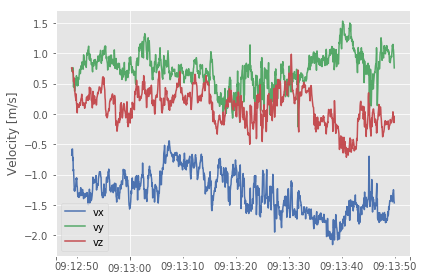

In [61]:
fig, ax = plt.subplots()
auxdat[['vx', 'vy', 'vz',]].plot(ax=ax)
ax.set_ylabel(r'Velocity [m/s]')
fig.tight_layout()

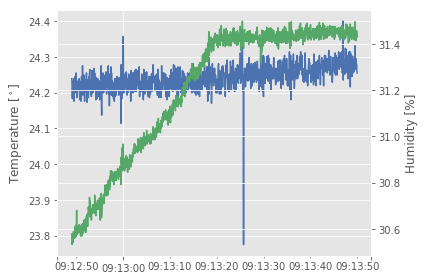

In [63]:
fig, ax = plt.subplots()
auxdat['T'].plot(ax=ax)
ax.set_ylabel(r'Temperature [$^\circ$]')
ax2 = ax.twinx()
auxdat['H'].plot(ax=ax2, color='C1')
ax2.set_ylabel(r'Humidity [%]')
fig.tight_layout()

### Main file data
timeseries of speaker and microphone signals

In [3]:
mainfile = datapath + '20180802091249_AcouTomMainData.txt'
colnames = ['S{}'.format(x) for x in range(8)] + ['M{}'.format(x) for x in range(8)]
maindat = pd.read_csv(mainfile, skiprows=4, names=colnames, delim_whitespace=True)
maindat.set_index(pd.DatetimeIndex(freq='50U', start=dt.datetime.strptime('20180802091249', '%Y%m%d%H%M%S'), periods=len(maindat.index)), inplace=True)

In [4]:
maindat.head()

,S0,S1,S2,S3,S4,S5,S6,S7,M0,M1,M2,M3,M4,M5,M6,M7
2018-08-02 09:12:49.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.010,-0.083,-0.202,-0.040,-0.075,-0.003,-0.027,-0.007
2018-08-02 09:12:49.000050,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.001,-0.069,-0.183,0.002,-0.046,0.008,-0.016,-0.017
2018-08-02 09:12:49.000100,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.008,-0.064,-0.165,0.024,-0.017,0.025,-0.027,-0.012
2018-08-02 09:12:49.000150,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.017,-0.035,-0.163,0.046,-0.014,0.050,-0.001,-0.017
2018-08-02 09:12:49.000200,0.0,0.0,0.0,0.009,0.0,0.0,0.0,0.0,0.039,-0.016,-0.188,0.038,-0.000,0.067,0.013,-0.008


In [5]:
sdata = maindat[[col for col in maindat.columns if 'S' in col]]
mdata = maindat[[col for col in maindat.columns if 'M' in col]]

In [6]:
sdata.head()

,S0,S1,S2,S3,S4,S5,S6,S7
2018-08-02 09:12:49.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2018-08-02 09:12:49.000050,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2018-08-02 09:12:49.000100,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0
2018-08-02 09:12:49.000150,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0
2018-08-02 09:12:49.000200,0.0,0.0,0.0,0.009,0.0,0.0,0.0,0.0


In [79]:
maindat.index[-1]-maindat.index[0]

Timedelta('0 days 00:01:00.999950')

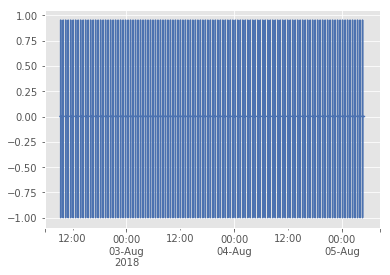

In [57]:
maindat.S0.plot()

In [80]:
maindat.shape

(1220000, 16)

In [68]:
auxdat.shape

(1220, 6)

In [81]:
# expected speaker signal locations (in samples) on time axis
t1Exp = [] #initialize the expected speaker signal location array. each of the folowing append commands add to the end of the (currently empty) array signifying the expected place on the time axis, in samples, of speaker output
t1Exp.append(4964)
t1Exp.append(4164)
t1Exp.append(8164)
t1Exp.append(4)
t1Exp.append(6404)
t1Exp.append(8004)
t1Exp.append(1604)
t1Exp.append(5764)

In [85]:
import numpy as np

In [86]:
np.array(t1Exp)-4

array([4960, 4160, 8160,    0, 6400, 8000, 1600, 5760])

In [397]:
constants = pd.read_csv('../../data/constants.py')

FileNotFoundError: File b'../../data/constants.py' does not exist

In [98]:
constants.bandWidth


0.7